# Recommended System Notebook
- User based recommendation
- User based prediction
- Item based recommendation
- Item based prediction
- Evaluation

In [69]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
beer = pd.read_csv('beer_data.csv')

In [70]:
#beer.duplicated()

In [71]:
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [72]:
counts = beer['beer_beerid'].value_counts().to_dict()

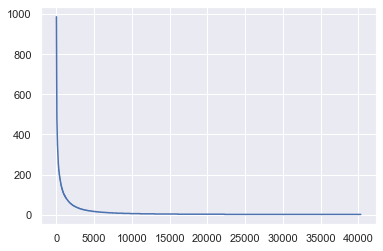

In [73]:
#plt.plot(counts)
plt.plot(range(len(counts)), list(counts.values()))

In [74]:
#beer[beer[['review_profilename', 'review_overall']].isin(counts[counts >=20].index)]
beer = beer.groupby('beer_beerid').filter(lambda x: len(x) >= 50)

In [75]:
beer.drop_duplicates()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
101,10784,CHILLINDYLAN,4.5
102,10784,JayQue,4.0
103,10784,AlCaponeJunior,4.0
104,10784,BEERchitect,4.0
...,...,...,...
475763,12172,charlzm,4.5
475764,12172,Viggo,3.5
475765,12172,grub,4.5
475766,12172,sinstaineddemon,4.5


## Dividing the dataset into train and test

In [76]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(beer, test_size=0.30, random_state=30)

In [77]:
print(train.shape)
print(test.shape)

(208142, 3)
(89204, 3)


In [78]:
train.drop_duplicates(inplace=True)

C:\Users\ersha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
# pivot ratings into beer features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
    #aggfunc='mean'
).fillna(0)

In [80]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df_beer_features.shape

(17123, 2069)

### Copy train and test dataset
These dataset will be used to prediction and evaluation. 
- Dummy train will be used later for prediction of the beer which has not been rated by the user. To ignore the beer rated by the user, we will mark it as 0 during prediction. The beer not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beer rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [82]:
dummy_train = train.copy()
dummy_test = test.copy()

In [83]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 0)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [84]:
# The beer not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The beer not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [85]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0runkp0s,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [86]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# User Similarity Matrix

## Using Cosine Similarity

In [87]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.05151555 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.05151555 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [88]:
user_correlation.shape

(17123, 17123)

## Using adjusted Cosine 

### Here, not removing the NaN values and calculating the mean only for the beer rated by the user

In [89]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [90]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the beer for each user aroung 0 mean

In [91]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

#### Average rating given by the users

In [92]:
mean

array([4.2826087, 4.       , 4.21875  , ..., 5.       , 4.       ,
       5.       ])

#### Overall average rating given by the user

In [93]:
average_mean = np.mean(mean)
average_mean

3.9388291602049503

In [94]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [95]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.         -0.03443317 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.03443317  0.          1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [96]:
users = beer_features.index[0:10]
users

Index(['0110x011', '04101Brewer', '05Harley', '0beerguy0', '0runkp0s', '0tt0',
       '1000Bottles', '1001111', '100floods', '1050Sudz'],
      dtype='object', name='review_profilename')

In [97]:
first_10_user = user_correlation[0:10, 0:10]
first_10_user

array([[ 1.        ,  0.        , -0.03443317,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.02791045,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.03443317,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.01961054,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.00238566,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        

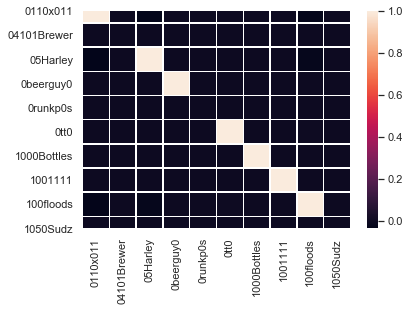

In [98]:
import seaborn as sns; sns.set()
ax = sns.heatmap(first_10_user, linewidths=.5, xticklabels=users, yticklabels=users)
plt.show()

## Prediction

### Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [99]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Rating predicted by the user (for beer rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset). 

In [100]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[1.08021496, 3.39593473, 1.77126419, ..., 1.25807707, 2.21947233,
        1.27570108],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.18702548, 4.41329831, 3.39699397, ..., 2.05788438, 2.95136025,
        1.37650858],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [101]:
user_predicted_ratings.shape

(17123, 2069)

### Since we are interested only in the beer not rated by the user, we will ignore the beer rated by the user by making it zero. 

In [102]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.080215,3.395935,1.771264,2.812227,0.292552,1.647332,3.650863,2.329887,8.444139,4.064073,...,6.675398,0.819729,0.557551,0.934867,1.340364,1.301108,0.799007,1.258077,2.219472,1.275701
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,2.187025,4.413298,3.396994,3.980091,1.129972,1.582688,3.845041,3.020586,11.961889,5.375659,...,5.468647,1.471974,0.969626,0.983442,1.009849,0.952888,1.033306,2.057884,2.951360,1.376509
0beerguy0,0.462734,1.247797,1.189105,3.226022,0.888656,0.392999,2.087861,0.711614,4.477474,4.193964,...,0.897121,0.778116,0.484757,0.320302,0.750008,0.214624,0.514131,0.321232,0.852736,0.462224
0runkp0s,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Finding the top 5 recommendation for the users

In [103]:
#For user 'cokes'
user_final_rating.ix['cokes'].sort_values(ascending=False)[0:5]

C:\Users\ersha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


beer_beerid
412     41.157535
1904    40.787254
4083    39.702745
1093    39.248579
1013    37.671341
Name: cokes, dtype: float64

In [104]:
#For user 'genog'
user_final_rating.ix['genog'].sort_values(ascending=False)[0:5]

C:\Users\ersha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


beer_beerid
2093     40.140864
1093     37.770100
11757    32.585039
4083     32.495871
276      32.328898
Name: genog, dtype: float64

In [105]:
#For user 'giblet'
user_final_rating.ix['giblet'].sort_values(ascending=False)[0:5]

C:\Users\ersha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


beer_beerid
2093    53.983131
1904    50.392770
1093    49.407005
412     48.704830
104     46.196213
Name: giblet, dtype: float64

# Item Based Similarity

## Using Correlation

### Taking the transpose of the rating matrix to normalize the rating around the mean for different beer. In the user based similarity, we had taken mean for each user intead of each beer. 

In [106]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zuggy9,zulufactor,zumicroom,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the beer rating for each beer

In [107]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

#### Average rating given to the beer

In [108]:
mean

array([3.57051282, 3.68539326, 3.29166667, ..., 3.79487179, 4.21264368,
       3.68181818])

#### Overall average rating given to the beer

In [109]:
average_mean = np.mean(mean)
average_mean

3.8190555267606077

In [110]:
df_subtracted.head()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zuggy9,zulufactor,zumicroom,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [111]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -1.29436812e-02  3.40620948e-02 ... -5.89741694e-03
   2.80863535e-02 -8.84760166e-04]
 [-1.29436812e-02  1.00000000e+00  4.28985018e-02 ...  2.36237241e-03
   2.46278150e-03  1.02924186e-02]
 [ 3.40620948e-02  4.28985018e-02  1.00000000e+00 ... -4.75705386e-04
  -9.47215849e-04  2.61905614e-02]
 ...
 [-5.89741694e-03  2.36237241e-03 -4.75705386e-04 ...  1.00000000e+00
   1.21741870e-02  1.77113879e-03]
 [ 2.80863535e-02  2.46278150e-03 -9.47215849e-04 ...  1.21741870e-02
   1.00000000e+00 -2.22678056e-02]
 [-8.84760166e-04  1.02924186e-02  2.61905614e-02 ...  1.77113879e-03
  -2.22678056e-02  1.00000000e+00]]


### Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [112]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.03406209, ..., 0.        , 0.02808635,
        0.        ],
       [0.        , 1.        , 0.0428985 , ..., 0.00236237, 0.00246278,
        0.01029242],
       [0.03406209, 0.0428985 , 1.        , ..., 0.        , 0.        ,
        0.02619056],
       ...,
       [0.        , 0.00236237, 0.        , ..., 1.        , 0.01217419,
        0.00177114],
       [0.02808635, 0.00246278, 0.        , ..., 0.01217419, 1.        ,
        0.        ],
       [0.        , 0.01029242, 0.02619056, ..., 0.00177114, 0.        ,
        1.        ]])

In [113]:
first_10_item = item_correlation[0:10, 0:10]
first_10_item

array([[1.        , 0.        , 0.03406209, 0.        , 0.        ,
        0.00331002, 0.01019813, 0.        , 0.        , 0.01458222],
       [0.        , 1.        , 0.0428985 , 0.        , 0.02255258,
        0.01348994, 0.        , 0.        , 0.        , 0.        ],
       [0.03406209, 0.0428985 , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.00117324, 0.02207168, 0.        , 0.01394446, 0.00408783],
       [0.        , 0.02255258, 0.        , 0.        , 1.        ,
        0.        , 0.01647006, 0.01672448, 0.02157432, 0.01316459],
       [0.00331002, 0.01348994, 0.        , 0.00117324, 0.        ,
        1.        , 0.        , 0.        , 0.01533679, 0.02396591],
       [0.01019813, 0.        , 0.        , 0.02207168, 0.01647006,
        0.        , 1.        , 0.01299044, 0.        , 0.05882708],
       [0.        , 0.        , 0.       

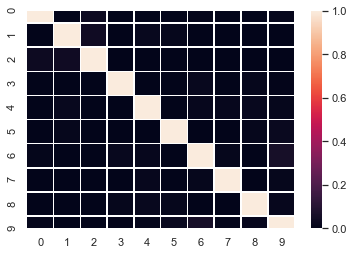

In [114]:
import seaborn as sns; sns.set()
ax = sns.heatmap(first_10_item, linewidths=.5)
plt.show()

# Prediction

In [115]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.06173536, 0.7466839 , 0.606243  , ..., 1.29974417, 0.58566475,
        0.99877053],
       [0.        , 0.12331185, 0.03360464, ..., 0.09019051, 0.        ,
        0.07190591],
       [0.07758834, 0.65311239, 0.55586527, ..., 0.22848513, 0.63660394,
        0.382217  ],
       ...,
       [0.25625761, 0.01604632, 0.29518236, ..., 0.        , 0.03660515,
        0.04262121],
       [0.        , 0.        , 0.01895655, ..., 0.00315516, 0.        ,
        0.03829853],
       [0.04330559, 0.        , 0.01115544, ..., 0.14011636, 0.00189435,
        0.27106245]])

In [116]:
item_predicted_ratings.shape

(17123, 2069)

In [117]:
dummy_train.shape

(17123, 2069)

### Filtering the rating only for the beer not rated by the user for recommendation

In [118]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.061735,0.746684,0.606243,0.595153,1.003143,1.143927,1.084499,0.866534,1.010845,0.597353,...,0.991969,0.517110,0.270558,0.709692,0.416572,0.434098,1.718609,1.299744,0.585665,0.998771
04101Brewer,0.000000,0.123312,0.033605,0.032733,0.000000,0.000000,0.000000,0.000000,0.182671,0.033221,...,0.290695,0.000000,0.000000,0.000000,0.039821,0.000000,0.000000,0.090191,0.000000,0.071906
05Harley,0.077588,0.653112,0.555865,1.095622,0.518500,0.533226,0.439680,0.516176,0.369985,0.383250,...,0.614939,0.361376,0.056086,0.758267,0.499447,0.332967,0.678766,0.228485,0.636604,0.382217
0beerguy0,0.219216,0.231743,0.114733,0.220599,0.204601,0.201298,0.181203,0.064855,0.214199,0.216211,...,0.038555,0.051430,0.026463,0.053013,0.005030,0.000000,0.021084,0.006019,0.084708,0.016699
0runkp0s,0.015988,0.000000,0.010901,0.004594,0.020447,0.000000,0.000000,0.162097,0.071099,0.059803,...,0.052905,0.000000,0.000000,0.015441,0.000000,0.004723,0.000000,0.004133,0.000000,0.037321


### Top 5 prediction for the users

In [119]:
#For user 'cokes'
item_final_rating.ix['cokes'].sort_values(ascending=False)[0:5]

C:\Users\ersha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


beer_beerid
6075     12.567768
33467    11.132356
1876     10.952758
1167     10.798996
96       10.796340
Name: cokes, dtype: float64

In [120]:
#For user 'genog'
item_final_rating.ix['genog'].sort_values(ascending=False)[0:5]

C:\Users\ersha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


beer_beerid
60681    4.987882
33467    4.952700
6502     4.944550
39775    4.942353
7799     4.440454
Name: genog, dtype: float64

In [121]:
#For user 'giblet'
item_final_rating.ix['giblet'].sort_values(ascending=False)[0:5]

C:\Users\ersha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


beer_beerid
54413    3.992703
729      3.805479
6590     3.483469
1144     3.424835
1894     3.412494
Name: giblet, dtype: float64

# Evaluation

### Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user. 

## Using User Similarity

In [122]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [123]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.14208987, 0.11619388, 0.09623561, ..., 0.        , 0.45668368,
        0.63649884],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.364834  , 0.14638482, 0.6310358 , ..., 0.        , 2.93548349,
        1.34836666],
       ...,
       [0.01721362, 1.35558931, 0.70853867, ..., 0.14602676, 0.04304768,
        0.3534341 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39970627, 1.96038885, 1.0914041 , ..., 0.        , 0.033445  ,
        0.97342066]])

### Doing prediction for the beer rated by the user

In [124]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [125]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the beer rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [126]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [127]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [128]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [129]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.0067976080394017


## Using Item similarity

In [130]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [131]:
test_item_correlation.shape

(2069, 2069)

In [132]:
test_beer_features.shape

(2069, 12467)

In [133]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

### Finding RMSE

In [ ]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

#### Conclusion: Item based similarity is performing slightly better than user based similarity. So, it should be deployed. 